# 분류성능 평가지표

* 정확도(Accuracy)
* 오차행렬(Confusion Matrix)
* 정밀도(Precision)
* 재현율(Recall)
* F1 스코어
* ROC AUC

## Accuracy(정확도)

* 전체 데이터 중에서 제대로 분류된 데이터의 비율을 나타냅니다. 
* 즉, **모델이 얼마나 정확하게 분류하는지**를 의미합니다. 
* 일반적으로 분류 모델의 주요 평가 방법으로 사용됩니다. 


* 그러나
* 클래스 비율이 불균형(imbalanced) 하거나 : 신용카드등 
* , 이진분류의 경우 평가 지표의 신뢰성을 잃을 수 있습니다. 
* 예)신용카드사기검출(분류)의 경우 10만건은 정상거래이고, 1건이 사기일 때 사기 검출이 정상거래로 잘못 분류되었어도 대다수의 분류가 잘 분류되었기 때문에 99.9%의 정확도 결과가 나옵니다. 


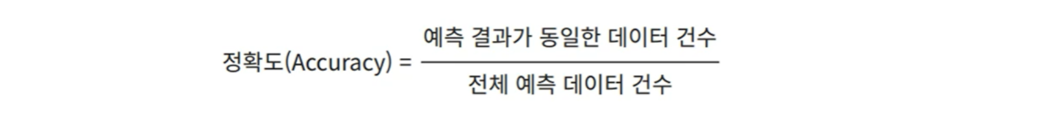

---

In [ ]:
# ## 코랩을 사용할 때
# #드라이브 마운트
# from google.colab import drive
# drive.mount('/content/drive')

# #현재 작업 위치 이동
# #띄어쓰기에 \붙일 것
# %cd /content/drive/Othercomputers/내\ 노트북/Devpy_work/02.멀티캠퍼스

### 정확도의 문제점 (Imbalanced Data)

* MNIST 데이터 셋에서 숫자 7을 분류할 때
* 전체 0~9까지의 이미지 데이터에서 7이 차지하는 비율이 불균형함

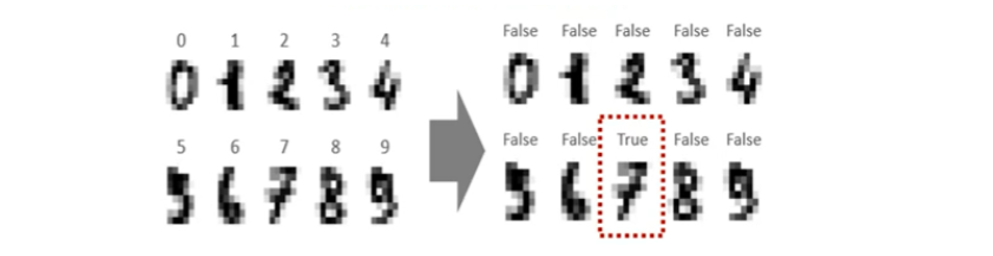

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator): # 가짜 분류 클레스를 만듦
    def fit(self,X,y):
        pass # 실제 학습은 전혀 이루어 지지 않음.
    
    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    # 분류의 대상이 되는 숫자가 7이든 아니든 상관없이 다수의 레이블 값인 0으로 만들어서 반환
    
    def predict(self,X):
        return np.zeros( (len(X), 1) , dtype=bool) # 0값으로 만들어서 반환 : 엉터리 예측을 함.


In [2]:

# 사이킷런의 내장 데이터 셋인 load_digits( )를 이용하여 MNIST 데이터 로딩
digits = load_digits()

print(digits.data)
print("### digits.data.shape:", digits.data.shape)
print(digits.target)
print("### digits.target.shape:", digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape: (1797, 64)
[0 1 2 ... 8 9 8]
### digits.target.shape: (1797,)


In [3]:
digits.target == 7 # 7을 찾을예정이기 떄문에 7만 True로 변경함.

array([False, False, False, ..., False, False, False])

In [4]:
#불균형한 데이터 값으로 변환해 봄
# digits번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환. 
y_Seven = (digits.target == 7).astype(int)
y_Seven[:30]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0])

In [5]:
X_train, X_test, y_train, y_test = train_test_split( digits.data, y_Seven, random_state=11)

In [6]:
# 불균형한 레이블 데이터 분포도 확인. 
print('레이블 테스트 세트 크기 :', y_test.shape) 
print('테스트 세트 레이블 0 과 1의 분포도')
print(pd.Series(y_test).value_counts())

'''레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0 과 1의 분포도
0    405
1     45 
dtype: int64 '''

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0 과 1의 분포도
0    405
1     45
dtype: int64


In [7]:
# Fake Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()

fakeclf.fit(X_train , y_train)

fakepred = fakeclf.predict(X_test)

print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test , fakepred)))

#모든 예측을 0으로 하여도 정확도는:0.900 -- accuracy의 단점, 불균형한 데이터에서 이진분류는 엉터리..나올수 있다.ㅠ

모든 예측을 0으로 하여도 정확도는:0.900


기억하세요

정확도는 양날의 칼이다.<br>
정확도는 직관적이어서 해석이 편합니다. <br>
하지만 불균형 데이터로 이진분류를 하려고 할때 정확도의 값은 엉터리 결과가 나올 수 있다는 것을 명심합시다. 

---

## Confusion Matrix(혼돈 행렬)

* 오차 행렬은 이진 분류의 예측 오류가 얼마인지 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표입니다. 

* **TN**: Negative라고 예측했는데 실제도 Negative  -- 정답
* **TP**: Positive라고 예측했는데 실제도 Positive -- 정답
* **FP**: Positive라고 예측했는데 실제는 Negative -- 오답
* **FN**: Negative라고 예측했는데 실제는 Positive -- 오답


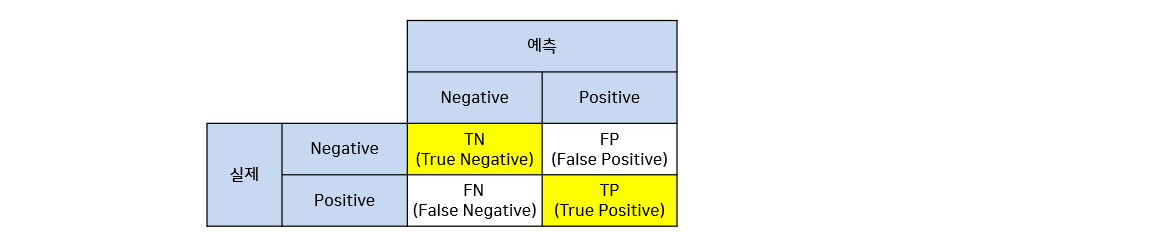

In [9]:
from sklearn.metrics import confusion_matrix

# 앞절의 예측 결과인 fakepred와 실제 결과인 y_test의 Confusion Matrix출력
confusion_matrix(y_test , fakepred)

#array([[405,   0],                   405 랑
 #      [ 45,   0]], dtype=int64)       0 을 봐야함. 왜 7 로 분류된게 없지? 45개는 왜 분류가 안됐을까?

array([[405,   0],
       [ 45,   0]], dtype=int64)

> TP가 왜 0이지? 숫자 7을 분류하는데 7을 제대로 분류한 케이스가 한 건도 없네? 이상하네!!

---

## Precision(정밀도)

* 예측을 Positive라고 분류한 데이터 중에서
* 실제로 Positive인 데이터 비율

**Negative가 중요한 경우**

즉, 실제로 Negative인 데이터를 Positive라고 판단하면 안되는 경우 사용되는 지표

* 스팸 메일 판결을 위한 분류 문제 
* 해당 메일이 스팸일 경우 Positive,
* 스팸이 아닐 경우 즉, 일반 메일일 경우 Negative
* 일반 메일[0]을 스팸 메일[[1]](Positive)로 잘못 예측했을 경우, 중요한 메일을 전달받지 못하는 상황(FP)이 발생할 수 있음

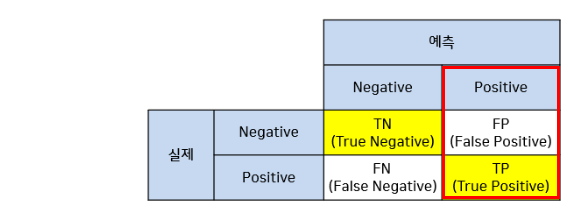

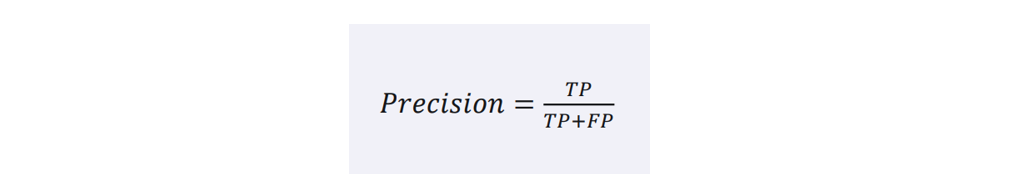

## Recall(재현율)

* 실제로 Positive인 데이터 중에서
* 예측이 Positive로 분류한 데이터의 비율
* 민감도(Sensitivity), 참긍정률(TP Rate)과 같은 말

**Positive가 중요한 경우**

즉,실제로 Positive인 데이터를 Negative라고 판단하면 안되는 경우 사용하는 지표

* 악성 종양 여부 판결을 위한 검사
* 악성 종양일 경우 Positive
* 악성 종양이 아닐 경우 즉, 양성 종양일 경우 Negative
* 악성 종양(Positive)을 양성 종양(Negative)으로 잘못 예측했을 경우(FN) 제 때 치료를 받지 못하게 되어 생명이 위험해질 수 있음


* 금융사기
    


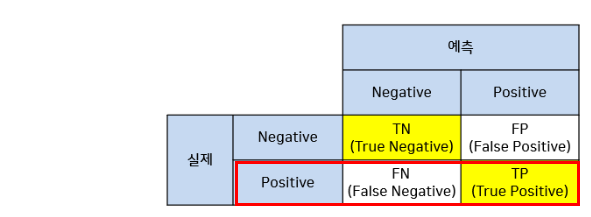

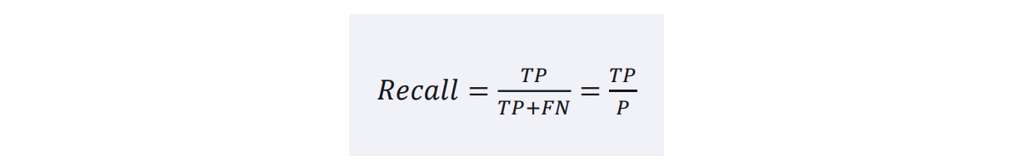

In [10]:
from sklearn.metrics import accuracy_score, precision_score , recall_score

print("정밀도:", precision_score(y_test, fakepred))
print("재현율:", recall_score(y_test, fakepred))

'''정밀도: 0.0
재현율: 0.0 '''#0점이 나옴, 

정밀도: 0.0
재현율: 0.0


c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



> 
>
> 정확도에서 점수가 잘 나왔지만, 정밀도 재현율을 통해 몹쓸 분류라는 것이 밝혀졌다.  



---

## 평가지표 한꺼번에 계산하는 함수 만들기

In [11]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

#분류 평가 지표
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred) #정밀도
    recall = recall_score(y_test , pred)  #재현율
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

In [12]:
get_clf_eval(y_test,fakepred)
'''오차 행렬
[[405   0]
 [ 45   0]]
정확도: 0.9000, 정밀도: 0.0000, 재현율: 0.0000''' # 정확은 90% 정밀,재현율이 0 점임 오차에 tp결과가 0 임을 주목하고 재정비해야함.

오차 행렬
[[405   0]
 [ 45   0]]
정확도: 0.9000, 정밀도: 0.0000, 재현율: 0.0000


c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---
정밀도와 재현율의 맹점

[정밀도를 100%로 만드는법]
    
* 확실한 기준이 되는 경우만 Positive로 예측하고 나머지는 모두 Negative로 예측합니다.
* 정밀도 = TP/ (FP + TP)
* 전체 환자 1000명 중 확실한 Positive 징후만 가진 환자는 단 1명이라고 하면 이 한 명만 Positive로 예측하고
* 나머지는 모두 Negative로 예측하더라도 FP는 0, TP는 1이 되므로 정밀도는 1/(1+0)으로 100%가 됩니다. 
    
    
[재현율 100%로 만드는법]
    
* 모든 환자를 Positive로 예측합니다.
* 재현율 = TP/ (TP + FN )
* 전체 환자 1000명을 모두 Positive라고 예측합니다. 
* 이 중 양성이 30명 밖에 안 되도, FN이 0 이므로 30/(30 + 0)으로 100%가 됩니다. 
</div>  

---

## F1 Score

* F1 스코어는 정밀도와 재현율을 결합한 지표입니다. 
* F1 스코어는 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가집니다. 
* 0 ~ 1 사이의 값 가집니다. 

예를 들어
* A 예측 모델의 경우 정밀도가 0.9, 재현율이 0.1 
* B 예측 모델의 경우 정밀도가 0.5, 재현율이 0.5
* F1 스코어는 A 예측 모델의 경우 0.18, B 예측 모델의 경우 0.5로
* 모델 B가 A에 비해 우수한 F1 스코어를 가집니다. 

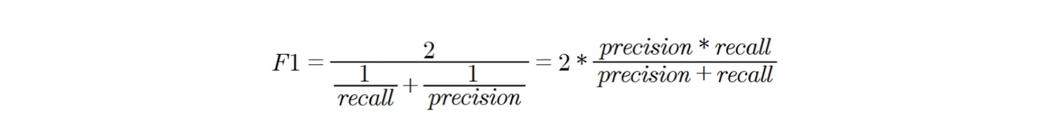

In [13]:
from sklearn.metrics import f1_score 
f1 = f1_score(y_test , fakepred)
'F1 스코어: {0:.4f}'.format(f1)


'F1 스코어: 0.0000'

In [14]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))


get_clf_eval(y_test, fakepred) # F1:0.0000 이 1에 가깝게 오는 것이 좋다.



오차 행렬
[[405   0]
 [ 45   0]]
정확도: 0.9000, 정밀도: 0.0000, 재현율: 0.0000, F1:0.0000


c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---

## 종합

### 분류 평가 함수

In [15]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score 
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))



